In [1]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt

os.chdir("../../")
cwd = os.getcwd()
from src.gpdssm.utils import get_random_state
random_state = get_random_state()

In [2]:
Du = 3
Dx = 2
Dy = 10
N = 10000
X = [[0.0, 0.0]]
Y = []
U = random_state.normal(0, 1, (N, Du))

A = random_state.normal(0, 1, (Dy, Dx))
B = random_state.beta(1, 1, (Dy, Dx))
C = random_state.normal(0, 1, (Dx, Du))
print(A)
print(B)
print(C)

[[ 0.36980244 -0.92146823]
 [-0.20707622 -1.17487388]
 [-0.0438673  -0.62030391]
 [ 1.39747757  0.67038692]
 [-0.12677965 -0.29391977]
 [-0.27463625  0.50970854]
 [ 0.1525      0.20363623]
 [ 0.44567164 -0.30791117]
 [ 0.42918463 -0.2825553 ]
 [ 0.75827579 -0.12622985]]
[[0.07772776 0.43557871]
 [0.33821786 0.79358001]
 [0.92904368 0.55058279]
 [0.50184227 0.4236726 ]
 [0.3866566  0.22474887]
 [0.83722117 0.61039721]
 [0.61559721 0.25025556]
 [0.52269019 0.30438649]
 [0.76119584 0.96065098]
 [0.96607945 0.65133849]]
[[ 0.5778548   1.02035473 -0.31012618]
 [-1.40939821 -0.20946605  0.25781669]]


In [3]:
def x_process(x, u):
    tmp = 0.5 * np.dot(C, u)
    x_next_1 = 0.9 * x[0] + 0.5 * np.sin(x[1]) + np.sin(tmp[0]) + random_state.normal(0., 1.0e-2)
    x_next_2 = 0.5 * np.cos(x[0]) + 0.9 * x[1] + np.cos(tmp[1]) + random_state.normal(0., 1.0e-2)
    return [x_next_1, x_next_2]

def generate_x_process(T):
    for t in range(T):
        x_next = x_process(X[-1], U[t])
        X.append(x_next)

In [4]:
generate_x_process(N)
X = np.array(X)

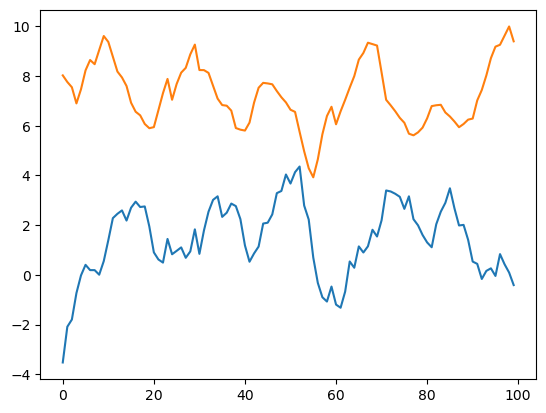

In [5]:
plt.plot(X[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case3", "x.png"))

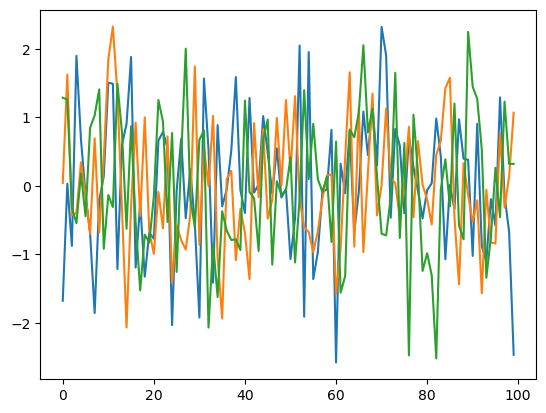

In [6]:
plt.plot(U[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case3", "u.png"))

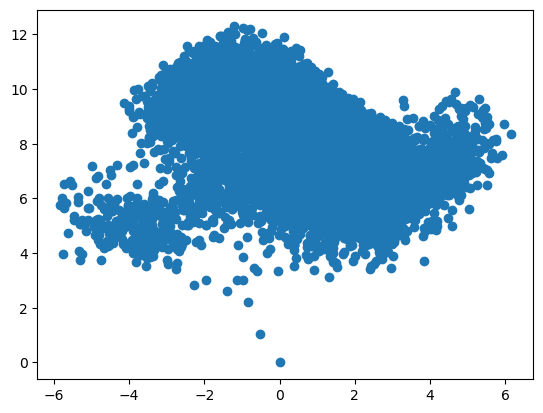

In [7]:
plt.scatter(X[:, 0], X[:, 1])

In [8]:
def y_process(x):
    y = 0.5 * np.dot(A, x) + np.sin(np.dot(B, x)) + np.random.normal(0., 0.01, 10)
    return y

def generate_y_process(T):
    for t in range(T):
        y_next = y_process(X[t+1])
        Y.append(y_next)

In [9]:
generate_y_process(N)
Y = np.array(Y)

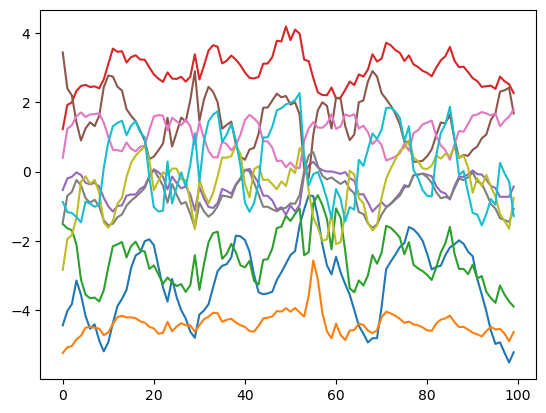

In [10]:
plt.plot(Y[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case3", "y.png"))

In [11]:
cwd = os.getcwd()
Y_path = os.path.join(cwd, "folds", "train_3_fold_1_Y.txt")
np.savetxt(Y_path, Y)

In [12]:
X_path = os.path.join(cwd, "folds", "train_3_fold_1_X.pickle")
with open(X_path, 'wb') as f:
    pickle.dump([X], f)

In [13]:
cwd = os.getcwd()
U_path = os.path.join(cwd, "folds", "train_3_fold_1_U.txt")
np.savetxt(U_path, U)